In [41]:
import os
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from p_tqdm import p_map
from tqdm.notebook import tqdm

cwd = os.getcwd()

print(cwd)

/research/haohang/CL-crowd-training


In [42]:
fitted_param_path = os.path.join(cwd, 'total_data', 'fitted_IRT', 'Country', 'best_parameters.json')
best_param_json = json.load(open(fitted_param_path))
ids_key = list(best_param_json['item_ids'].keys())
ids_key_copy = ids_key.copy()
ids_key_copy.sort()

print(type(best_param_json))
print(best_param_json.keys())

<class 'dict'>
dict_keys(['ability', 'diff', 'irt_model', 'item_ids', 'subject_ids'])


In [5]:
print(ids_key)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [6]:
print(ids_key_copy)

['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10008', '10009', '1001', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017', '10018', '10019', '1002', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '1003', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '1004', '10040', '10041', '10042', '10043', '10044', '10045', '10046', '10047', '10048', '10049', '1005', '10050', '10051', '10052', '10053', '10054', '10055', '10056', '10057', '10058', '10059', '1006', '10060', '10061', '10062', '10063', '10064', '10065', '10066', '10067', '10068', '10069', '1007', '10070', '10071', '10072', '10073', '10074', '10075', '10076', '10077', '10078', '10079', '1008', '10080', '10081', '10082', '10083', '10084', '10085', '10086', '10087', '10088', '10089', '1009', '10090', '10091', '10092', '10093', '10094', '10095', '10096', '10097', '10098', '1009

## Ability - Difficulties

### Class: Country

Difficulties DF

In [7]:
fitted_param_path = os.path.join(cwd, 'total_data', 'fitted_IRT', 'Country', 'best_parameters.json')
best_param_json = json.load(open(fitted_param_path))
ids_key = list(best_param_json['item_ids'].keys())

# ordering the id - ascending
ids_key_number = [int(i) for i in ids_key]
ids_key_number.sort()
ids_key = [str(i) for i in ids_key_number]
ids = [best_param_json['item_ids'][i] for i in ids_key]

# difficulties df
diff_df = pd.DataFrame({'ID': ids, 'diff': best_param_json['diff']})
ability_df = pd.DataFrame(best_param_json['ability'])

print(type(best_param_json))
print(best_param_json.keys())
diff_df

<class 'dict'>
dict_keys(['ability', 'diff', 'irt_model', 'item_ids', 'subject_ids'])


,ID,diff
0,cf0746a4-2b0c-46a2-be69-42831266c91c,2.636121
1,18d83c93-19bc-4407-aab0-d66fac37609b,-1.930738
2,279d7a90-99f3-4847-b1fd-4812ddab3a52,-0.135029
3,9018525f-7545-437b-9d15-d1307ba9c11e,1.455165
4,105f09b4-8527-4aeb-aeb1-a1b489815fb1,3.019341
...,...,...
49974,336be145-bd71-4385-9011-2d9ca286b796,-2.080055
49975,31d94ea1-e856-4e26-9d5e-fe0a54d85504,-1.893518
49976,dc0e39ba-ca6f-4b05-9e4a-96001edf1ef2,-0.665785
49977,e53f4e41-896a-47e0-874d-d038c5499f8e,-0.227145


In [8]:
ability_df

,0
0,1.385124
1,1.354232
2,1.606054
3,0.974096
4,1.868581
...,...
103,1.707041
104,1.134762
105,1.994467
106,2.346894


In [9]:
# sanity check
print(ids[:5])
print(ids[-5:])

['cf0746a4-2b0c-46a2-be69-42831266c91c', '18d83c93-19bc-4407-aab0-d66fac37609b', '279d7a90-99f3-4847-b1fd-4812ddab3a52', '9018525f-7545-437b-9d15-d1307ba9c11e', '105f09b4-8527-4aeb-aeb1-a1b489815fb1']
['336be145-bd71-4385-9011-2d9ca286b796', '31d94ea1-e856-4e26-9d5e-fe0a54d85504', 'dc0e39ba-ca6f-4b05-9e4a-96001edf1ef2', 'e53f4e41-896a-47e0-874d-d038c5499f8e', '3e9ef153-b0d4-4e3d-8797-d1d03452b789']


Task DF

In [10]:
task_df = pd.read_csv(os.path.join(cwd, 'total_data', 'task', 'Country.csv'))
task_df

,ID,Pos_support_locs,Neg_support_locs,Query_loc,Label,Alpha,Aug_type,Train
0,00023041-4878-4156-9285-be9283756080,"[50, 83, 37, 75, 36]","[263, 562, 428, 504, 476]",618,0.0,4,3,True
1,0003a379-00df-40b9-a2ea-48c2be8a69a3,"[7, 71, 37, 41, 43]","[189, 402, 590, 145, 161]",99,1.0,4,2,True
2,00040fc6-723a-487b-92f7-7c86be7fbb18,"[135, 64, 104, 115, 7]","[190, 569, 168, 159, 613]",137,1.0,5,1,True
3,000446a8-ac61-40ed-b1ee-834e3de1a31a,"[43, 134, 71, 50, 131]","[600, 120, 520, 193, 381]",33,1.0,1,4,True
4,0005769e-cb8c-4ef5-9130-e1dcc01224c7,"[41, 43, 115, 71, 75]","[199, 400, 484, 159, 633]",101,1.0,0,4,True
...,...,...,...,...,...,...,...,...
49974,ffed6f7a-47fb-4a3a-be9e-9144937f087a,"[101, 104, 111, 130, 100]","[109, 600, 520, 470, 152]",112,0.0,0,0,False
49975,ffed8800-74df-43b3-b3a1-c95f24f835aa,"[134, 106, 75, 36, 131]","[39, 455, 437, 557, 633]",56,0.0,0,0,False
49976,fff1eebe-b1b4-4870-bc3e-2badbaa7d480,"[62, 134, 64, 75, 43]","[365, 654, 18, 145, 203]",168,0.0,0,0,False
49977,fff540b6-3683-4f2f-bedf-414326314671,"[71, 37, 104, 98, 115]","[213, 404, 393, 421, 22]",14,1.0,0,0,False


Merge

In [11]:
total_df = pd.merge(task_df, diff_df, on='ID')
total_df

,ID,Pos_support_locs,Neg_support_locs,Query_loc,Label,Alpha,Aug_type,Train,diff
0,00023041-4878-4156-9285-be9283756080,"[50, 83, 37, 75, 36]","[263, 562, 428, 504, 476]",618,0.0,4,3,True,-1.729709
1,0003a379-00df-40b9-a2ea-48c2be8a69a3,"[7, 71, 37, 41, 43]","[189, 402, 590, 145, 161]",99,1.0,4,2,True,1.943593
2,00040fc6-723a-487b-92f7-7c86be7fbb18,"[135, 64, 104, 115, 7]","[190, 569, 168, 159, 613]",137,1.0,5,1,True,-0.318824
3,000446a8-ac61-40ed-b1ee-834e3de1a31a,"[43, 134, 71, 50, 131]","[600, 120, 520, 193, 381]",33,1.0,1,4,True,3.320057
4,0005769e-cb8c-4ef5-9130-e1dcc01224c7,"[41, 43, 115, 71, 75]","[199, 400, 484, 159, 633]",101,1.0,0,4,True,-2.261216
...,...,...,...,...,...,...,...,...,...
49974,ffed6f7a-47fb-4a3a-be9e-9144937f087a,"[101, 104, 111, 130, 100]","[109, 600, 520, 470, 152]",112,0.0,0,0,False,0.084903
49975,ffed8800-74df-43b3-b3a1-c95f24f835aa,"[134, 106, 75, 36, 131]","[39, 455, 437, 557, 633]",56,0.0,0,0,False,-0.474173
49976,fff1eebe-b1b4-4870-bc3e-2badbaa7d480,"[62, 134, 64, 75, 43]","[365, 654, 18, 145, 203]",168,0.0,0,0,False,-0.483162
49977,fff540b6-3683-4f2f-bedf-414326314671,"[71, 37, 104, 98, 115]","[213, 404, 393, 421, 22]",14,1.0,0,0,False,-2.093403


Distribution

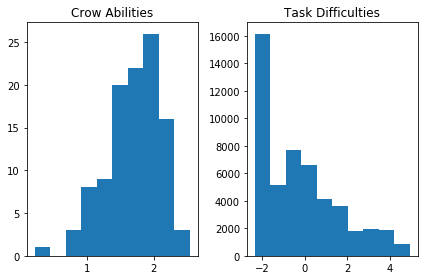

In [12]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(ability_df.iloc[:, 0])
axes[0].title.set_text('Crow Abilities')
axes[1].hist(total_df['diff'])
axes[1].title.set_text('Task Difficulties')
fig.tight_layout()
plt.show()

In [13]:
ability_df.describe()

,0
count,108.000000
mean,1.706442
std,0.409480
min,0.210714
25%,1.456481
50%,1.770730
75%,1.985787
max,2.539297


In [52]:
total_df['diff'].describe()

count    49995.000000
mean        -1.354089
std          5.448190
min        -28.668888
25%         -2.634816
50%          0.213133
75%          2.046503
max         20.790653
Name: diff, dtype: float64

### All Classes

In [14]:
col_names = ['Study Period', 'Perspective', 'Population', 'Sample Size', 'Intervention', 'Country']

Difficulties DFs

In [17]:
diff_dfs = {}
ability_dfs = {}

for cur_col in col_names:
    fitted_param_path = os.path.join(cwd, 'total_data', 'fitted_IRT', cur_col, 'best_parameters.json')
    best_param_json = json.load(open(fitted_param_path))
    ids_key = list(best_param_json['item_ids'].keys())

    # ordering the id - ascending
    ids_key_number = [int(i) for i in ids_key]
    ids_key_number.sort()
    ids_key = [str(i) for i in ids_key_number]
    ids = [best_param_json['item_ids'][i] for i in ids_key]

    # difficulties df
    diff_df = pd.DataFrame({'ID': ids, 'diff': best_param_json['diff']})
    task_df = pd.read_csv(os.path.join(cwd, 'total_data', 'task', cur_col + '.csv'))
    diff_df = pd.merge(task_df, diff_df, on='ID')
    ability_df = pd.DataFrame(best_param_json['ability'])

    # append
    diff_dfs[cur_col] = diff_df
    ability_dfs[cur_col] = ability_df

In [18]:
# check
print(ability_dfs.keys())
diff_dfs.keys()

dict_keys(['Study Period', 'Perspective', 'Population', 'Sample Size', 'Intervention', 'Country'])


dict_keys(['Study Period', 'Perspective', 'Population', 'Sample Size', 'Intervention', 'Country'])

In [19]:
ability_dfs['Study Period']

,0
0,1.377512
1,2.105123
2,1.433667
3,1.651064
4,1.593128
...,...
103,1.742554
104,1.416418
105,1.836988
106,1.623111


In [20]:
diff_dfs['Study Period']

,ID,Pos_support_locs,Neg_support_locs,Query_loc,Label,Alpha,Aug_type,Train,diff
0,000045bb-76c1-4eeb-a3ee-0ee4acb5db00,"[68, 114, 96, 61, 0]","[322, 571, 207, 604, 636]",108,1.0,2,2,True,2.478691
1,0001238f-43c1-4eaa-983c-bfcabb6a017e,"[118, 124, 70, 114, 125]","[546, 278, 360, 599, 285]",110,1.0,5,3,True,2.230998
2,0001d31b-b8b2-4192-9b06-ee49587f5746,"[59, 124, 106, 116, 122]","[442, 227, 194, 421, 64]",7,1.0,3,2,True,0.269512
3,000344fa-e6d0-4de3-96f8-0d56cafecfbd,"[121, 59, 66, 0, 41]","[135, 573, 363, 76, 441]",108,1.0,3,4,True,3.041255
4,00052965-d74d-4a61-9d6b-fa1b27da9984,"[116, 96, 113, 66, 41]","[44, 12, 183, 604, 217]",489,0.0,4,3,True,-2.354614
...,...,...,...,...,...,...,...,...,...
49980,ffef9b09-51ac-4393-aa9d-c731ff503e7c,"[113, 125, 106, 97, 59]","[219, 67, 400, 438, 351]",211,0.0,0,0,False,-0.650127
49981,fff5e33f-2374-4028-963e-63ab4f7fc3de,"[6, 108, 96, 66, 97]","[311, 451, 85, 435, 480]",410,0.0,0,0,False,-1.770105
49982,fff62a40-674c-426f-9c15-9209abf0f43a,"[97, 0, 114, 25, 94]","[281, 75, 511, 199, 428]",293,0.0,0,0,False,-2.343095
49983,fff72708-a9bf-4dd9-ab2b-4a871f9acd40,"[121, 42, 68, 122, 59]","[344, 255, 539, 1, 340]",76,0.0,0,0,False,-2.131451


Plots

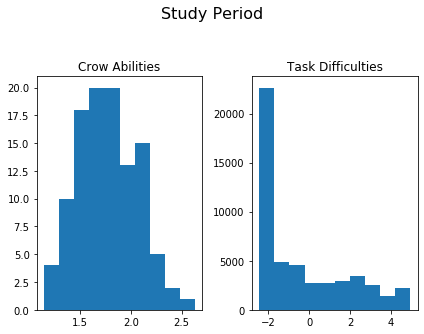

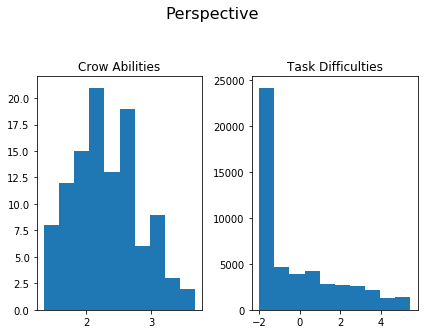

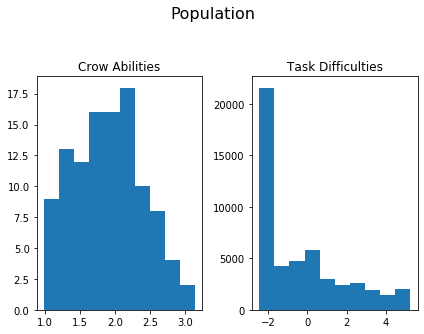

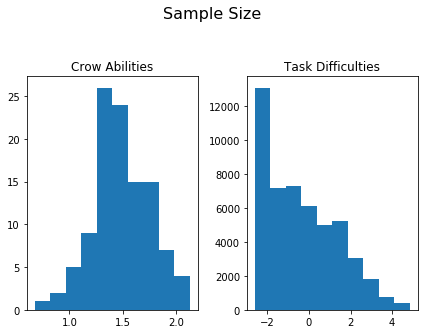

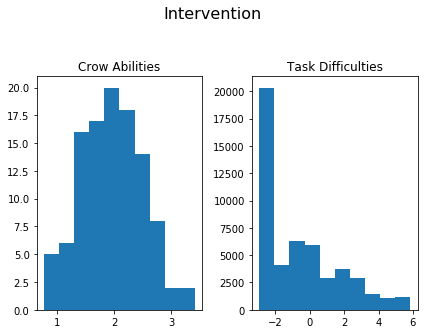

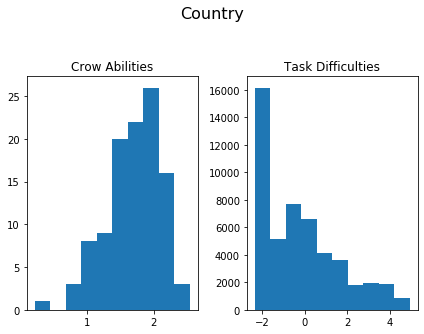

In [22]:
# overall
for cur_col in col_names:
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(ability_dfs[cur_col].iloc[:, 0])
    axes[0].title.set_text('Crow Abilities')
    axes[1].hist(diff_dfs[cur_col]['diff'])
    axes[1].title.set_text('Task Difficulties')
    fig.tight_layout()
    fig.suptitle(cur_col, size=16, y=1.15)
    fig.savefig(os.path.join(cwd, 'saved_figures', cur_col + '_ability_difficulties.png'), bbox_inches='tight')
plt.show()

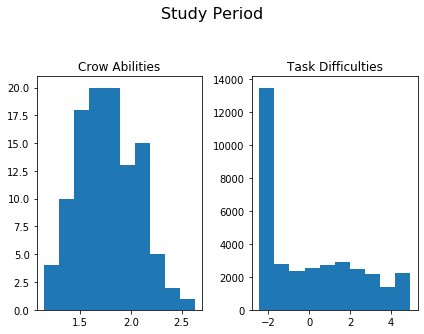

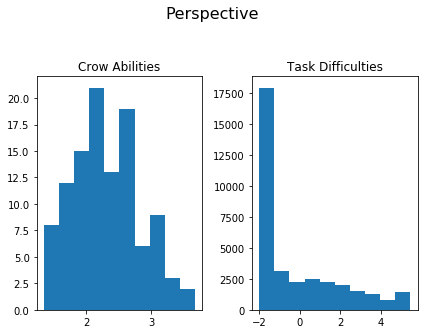

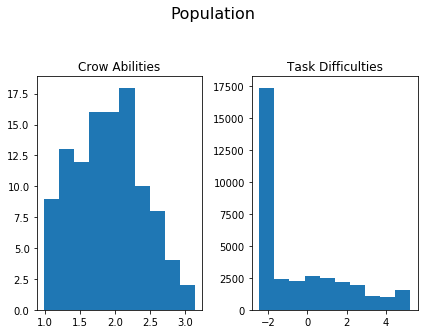

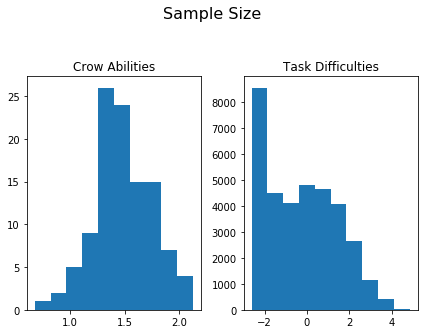

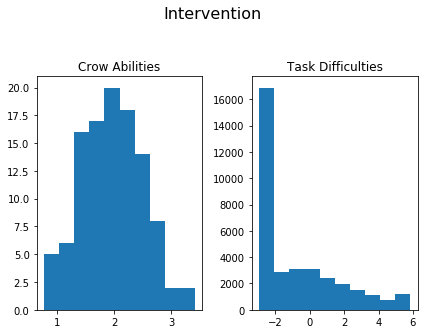

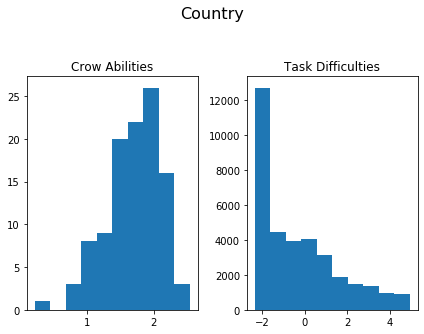

In [23]:
# train data: augmented data
for cur_col in col_names:
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(ability_dfs[cur_col].iloc[:, 0])
    axes[0].title.set_text('Crow Abilities')
    cur_diff_df = diff_dfs[cur_col]
    cur_diff_df = cur_diff_df[cur_diff_df['Train'] == True]
    axes[1].hist(cur_diff_df['diff'])
    axes[1].title.set_text('Task Difficulties')
    fig.tight_layout()
    fig.suptitle(cur_col, size=16, y=1.15)
    plt.show()

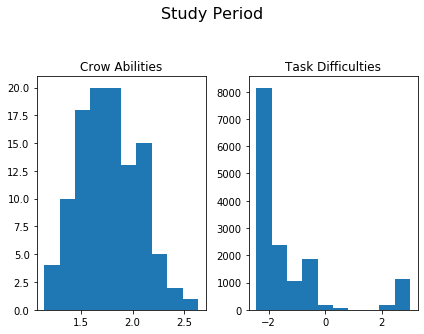

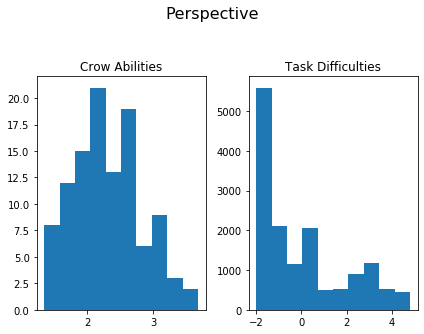

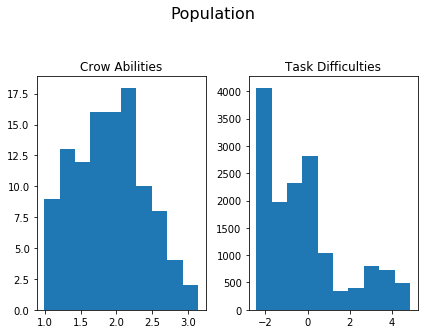

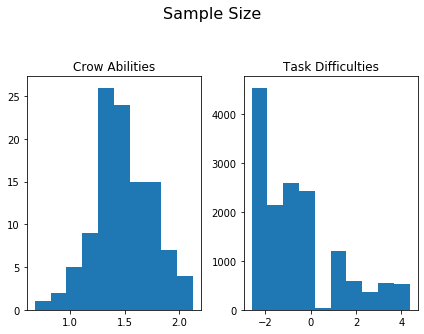

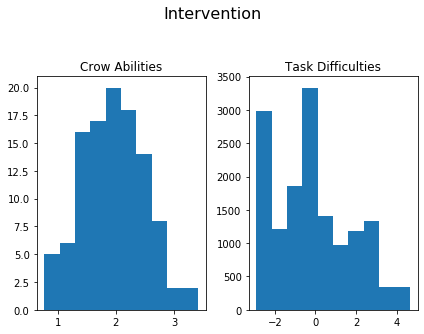

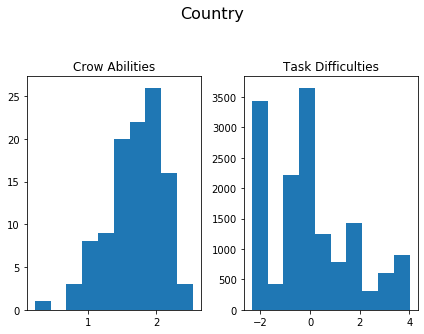

In [24]:
# valid data: non-augmented data
# overall
for cur_col in col_names:
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(ability_dfs[cur_col].iloc[:, 0])
    axes[0].title.set_text('Crow Abilities')
    cur_diff_df = diff_dfs[cur_col]
    cur_diff_df = cur_diff_df[cur_diff_df['Train'] == False]
    axes[1].hist(cur_diff_df['diff'])
    axes[1].title.set_text('Task Difficulties')
    fig.tight_layout()
    fig.suptitle(cur_col, size=16, y=1.15)
    plt.show()

## Accuracy - Difficulties

### Class: Country

In [25]:
# task difficulties
fitted_param_path = os.path.join(cwd, 'total_data', 'fitted_IRT', 'Country', 'best_parameters.json')
best_param_json = json.load(open(fitted_param_path))
ids_key = list(best_param_json['item_ids'].keys())

# ordering the id - ascending
ids_key_number = [int(i) for i in ids_key]
ids_key_number.sort()
ids_key = [str(i) for i in ids_key_number]
ids = [best_param_json['item_ids'][i] for i in ids_key]

# difficulties df
diff_df = pd.DataFrame({'ID': ids, 'diff': best_param_json['diff']})
diff_df

,ID,diff
0,cf0746a4-2b0c-46a2-be69-42831266c91c,2.636121
1,18d83c93-19bc-4407-aab0-d66fac37609b,-1.930738
2,279d7a90-99f3-4847-b1fd-4812ddab3a52,-0.135029
3,9018525f-7545-437b-9d15-d1307ba9c11e,1.455165
4,105f09b4-8527-4aeb-aeb1-a1b489815fb1,3.019341
...,...,...
49974,336be145-bd71-4385-9011-2d9ca286b796,-2.080055
49975,31d94ea1-e856-4e26-9d5e-fe0a54d85504,-1.893518
49976,dc0e39ba-ca6f-4b05-9e4a-96001edf1ef2,-0.665785
49977,e53f4e41-896a-47e0-874d-d038c5499f8e,-0.227145


In [26]:
# tasks' acc
model_judgement_dfs = [pd.read_csv(os.path.join(cwd, 'total_data', 'model_judgement', 'Country', str(i) + '.pth.csv')) for i in range(100)]
task_IDs = diff_df['ID'].tolist()

# function
def one_task_acc(the_task_id):
    judgements = []
    for i in range(100):
        cur_df = model_judgement_dfs[i]
        cur_judgement = cur_df[cur_df['ID'] == the_task_id]['Judgement'].iloc[0]
        judgements.append(cur_judgement)

    # global tasks_acc_result
    # tasks_acc_result[the_task_id] = np.sum(judgements) / len(judgements)
    return np.sum(judgements) / len(judgements)

# run
result = p_map(one_task_acc, task_IDs[:100], num_cpus=10)
result_df = pd.DataFrame({'ID': task_IDs[:100], 'acc': result})

  0%|          | 0/100 [00:00<?, ?it/s]

In [27]:
result_df

,ID,acc
0,cf0746a4-2b0c-46a2-be69-42831266c91c,0.29
1,18d83c93-19bc-4407-aab0-d66fac37609b,0.98
2,279d7a90-99f3-4847-b1fd-4812ddab3a52,0.85
3,9018525f-7545-437b-9d15-d1307ba9c11e,0.55
4,105f09b4-8527-4aeb-aeb1-a1b489815fb1,0.22
...,...,...
95,6dfa3dac-0d3c-4191-98f8-c5cb43d542b1,0.57
96,76f35fa1-ffbd-40b0-b3fa-1e0238d09a4c,0.62
97,1b49712e-3d20-4a0a-b0e9-c30066f4b3ec,0.76
98,4c1188ef-2922-4e8e-805e-cec40b50778b,0.85


### All Classes

In [43]:
col_names = ['Study Period', 'Perspective', 'Population', 'Sample Size', 'Intervention', 'Country']

In [44]:
# function
def one_task_acc(the_task_id):
    judgements = []
    for i in range(100):
        cur_df = model_judgement_dfs[i]
        cur_judgement = cur_df[cur_df['ID'] == the_task_id]['Judgement'].iloc[0]
        judgements.append(cur_judgement)

    return np.sum(judgements) / len(judgements)

In [45]:
all_classes_acc_result = {}

for cur_col in col_names:
    print(f'{cur_col} started')
    # task difficulties
    fitted_param_path = os.path.join(cwd, 'total_data', 'fitted_IRT', cur_col, 'best_parameters.json')
    best_param_json = json.load(open(fitted_param_path))
    ids_key = list(best_param_json['item_ids'].keys())

    # ordering the id - ascending
    ids_key_number = [int(i) for i in ids_key]
    ids_key_number.sort()
    ids_key = [str(i) for i in ids_key_number]
    ids = [best_param_json['item_ids'][i] for i in ids_key]

    # difficulties df
    diff_df = pd.DataFrame({'ID': ids, 'diff': best_param_json['diff']})  # FIXME

    # model judgements
    model_judgement_dfs = [pd.read_csv(os.path.join(cwd, 'total_data', 'model_judgement', cur_col, str(i) + '.pth.csv')) for i in range(100)]
    task_IDs = diff_df['ID'].tolist()

    # calculate acc
    acc_result = p_map(one_task_acc, task_IDs, num_cpus=10)
    acc_result_df = pd.DataFrame({'ID': task_IDs, 'acc': acc_result})

    # append
    all_classes_acc_result[cur_col] = pd.merge(diff_df, acc_result_df, on='ID')

Study Period started


  0%|          | 0/49985 [00:00<?, ?it/s]

Perspective started


  0%|          | 0/49976 [00:00<?, ?it/s]

Population started


  0%|          | 0/49980 [00:00<?, ?it/s]

Sample Size started


  0%|          | 0/49973 [00:00<?, ?it/s]

Intervention started


  0%|          | 0/49982 [00:00<?, ?it/s]

Country started


  0%|          | 0/49979 [00:00<?, ?it/s]

In [46]:
with open(os.path.join(cwd, 'total_data', 'all_classes_acc_result.pkl'), 'wb') as f:
    pickle.dump(all_classes_acc_result, f)

In [ ]:
with open(os.path.join(cwd, 'total_data', 'all_classes_acc_result.pkl'), 'rb') as f:
    all_classes_acc_result = pickle.load(f)

all_classes_acc_result.keys()

In [ ]:
np.corrcoef(all_classes_acc_result['Study Period']['diff'], all_classes_acc_result['Study Period']['acc'])[0][1]

In [ ]:
corr_dict = {}
for cur_col in col_names:
    cur_corr = np.corrcoef(all_classes_acc_result[cur_col]['diff'], all_classes_acc_result[cur_col]['acc'])[0][1]
    corr_dict[cur_col] = cur_corr

In [ ]:
corr_dict

In [ ]:
all_classes_acc_result['Study Period']

In [ ]:
# overall
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
col_counter = 0
row_counter = 0
for i in range(6):
    cur_col = col_names[i]
    axes[col_counter][row_counter].scatter(all_classes_acc_result[cur_col]['acc'], all_classes_acc_result[cur_col]['diff'])
    axes[col_counter][row_counter].title.set_text(cur_col)
    axes[col_counter][row_counter].set_xlabel('Accuracy')
    axes[col_counter][row_counter].set_ylabel('Difficulty')
    row_counter += 1
    if row_counter % 3 == 0:
        col_counter +=1
        row_counter = 0
fig.tight_layout()
fig.suptitle('Task Accuracy', size=16, y=1.05)
plt.show()

In [ ]:
# overall
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
col_counter = 0
row_counter = 0
for i in range(6):
    cur_col = col_names[i]
    axes[col_counter][row_counter].hist(all_classes_acc_result[cur_col]['acc'])
    axes[col_counter][row_counter].title.set_text(cur_col)
    row_counter += 1
    if row_counter % 3 == 0:
        col_counter +=1
        row_counter = 0
fig.tight_layout()
fig.suptitle('Task Accuracy', size=16, y=1.05)
plt.show()

In [ ]:
# overall
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
col_counter = 0
row_counter = 0
for i in range(6):
    cur_col = col_names[i]
    cur_task_df = pd.read_csv(os.path.join(cwd, 'total_data', 'task', cur_col + '.csv'))
    cur_df = pd.merge(cur_task_df, all_classes_acc_result[cur_col], on='ID')
    cur_df = cur_df[cur_df['Train'] == True]
    axes[col_counter][row_counter].hist(cur_df['acc'])
    axes[col_counter][row_counter].title.set_text(cur_col)
    row_counter += 1
    if row_counter % 3 == 0:
        col_counter +=1
        row_counter = 0
fig.tight_layout()
fig.suptitle('Task Accuracy(Train)', size=16, y=1.05)
plt.show()

In [ ]:
# overall
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
col_counter = 0
row_counter = 0
for i in range(6):
    cur_col = col_names[i]
    cur_task_df = pd.read_csv(os.path.join(cwd, 'total_data', 'task', cur_col + '.csv'))
    cur_df = pd.merge(cur_task_df, all_classes_acc_result[cur_col], on='ID')
    cur_df = cur_df[cur_df['Train'] == False]
    axes[col_counter][row_counter].hist(cur_df['acc'])
    axes[col_counter][row_counter].title.set_text(cur_col)
    row_counter += 1
    if row_counter % 3 == 0:
        col_counter +=1
        row_counter = 0
fig.tight_layout()
fig.suptitle('Task Accuracy(Valid)', size=16, y=1.05)
plt.show()

### Corruption Issue

In [35]:
train_pos_positions = pickle.load(open(os.path.join(cwd, 'aug_data', 'train_pos_dict.pkl'), 'rb'))
train_neg_positions = pickle.load(open(os.path.join(cwd, 'aug_data', 'train_neg_dict.pkl'), 'rb'))

In [38]:
for cur_col in col_names:
    print(f'Class: [{cur_col}], Number of positve: {len(train_pos_positions[cur_col])}, Number of negative: {len(train_neg_positions[cur_col])}')

Class: Study Period, Number of positve: 33, Number of negative: 521
Class: Perspective, Number of positve: 66, Number of negative: 454
Class: Population, Number of positve: 62, Number of negative: 464
Class: Sample Size, Number of positve: 41, Number of negative: 505
Class: Intervention, Number of positve: 42, Number of negative: 502
Class: Country, Number of positve: 32, Number of negative: 522
